In [114]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
import scipy as sp
import itertools
%matplotlib inline
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns 
#sets up styles and gives us more plotting 
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [115]:
from statsmodels.graphics.tsaplots import plot_acf  #自相关图
from statsmodels.tsa.stattools import adfuller as ADF  #平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf    #偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox    #白噪声检验
from statsmodels.tsa.arima_model import ARIMA#seaborn 是建立在matplotlib之上的
from statsmodels.tsa.arima_model import ARMA
%matplotlib inline 

%pylab inline

#jupyter中文显示是方框，加入下面两行即可显示中文，若嫌麻烦，也可去网上搜索如何永久显示中文
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
pylab.rcParams['figure.figsize'] = (18, 7)   #设置输出图片大小
#sns.set(color_codes=False) #seaborn设置背景
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['xlabel', 'ylabel']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [116]:
regular1=pd.read_csv("Android 1.csv")
regular1=regular1.iloc[::-1]
regular1.reset_index(drop=True, inplace=True)

In [117]:
regular1[0:7]

,日期,启动次数,活跃用户,活跃用户中新用户占比,新增用户,用户周活跃率,版本,节假日,疫情
0,2018/08/05~2018/08/11,42254,7128,0.168,1198,0.511,1,0,0.0
1,2018/08/12~2018/08/18,42704,7404,0.185,1366,0.483,1,0,0.0
2,2018/08/19~2018/08/25,42231,7318,0.149,1088,0.446,1,0,0.0
3,2018/08/26~2018/09/01,43220,7404,0.129,956,0.426,1,0,0.0
4,2018/09/02~2018/09/08,45322,7751,0.134,1040,0.421,1,0,0.0
5,2018/09/09~2018/09/15,43948,7776,0.128,998,0.401,1,0,0.0
6,2018/09/16~2018/09/22,41548,7663,0.114,875,0.378,1,0,0.0


In [118]:
regular2=pd.read_csv("IOS 1.csv")
regular2=regular2.iloc[::-1]
regular2.reset_index(drop=True, inplace=True)

In [119]:
regular2

,日期,启动次数,活跃用户,活跃用户中新用户占比,新增用户,用户周活跃率,版本,节假日,疫情
0,2018/08/05~2018/08/11,30552,3854,0.172,663,0.514,1,0,0.0
1,2018/08/12~2018/08/18,31531,4041,0.169,682,0.494,1,0,0.0
2,2018/08/19~2018/08/25,30562,3895,0.139,542,0.447,1,0,0.0
3,2018/08/26~2018/09/01,30353,4001,0.126,504,0.434,1,0,0.0
4,2018/09/02~2018/09/08,32230,4143,0.119,491,0.427,1,0,0.0
...,...,...,...,...,...,...,...,...,...
95,2020/05/31~2020/06/06,99851,10970,0.057,620,0.202,16,0,0.3
96,2020/06/07~2020/06/13,101521,10942,0.054,595,0.199,16,0,0.3
97,2020/06/14~2020/06/20,98825,10906,0.052,570,0.197,16,0,0.3
98,2020/06/21~2020/06/27,67670,9334,0.047,435,0.167,17,0,0.5


In [120]:
regular=regular1+regular2
regular['日期']=regular1['日期']
regular['活跃用户中新用户占比']=regular['活跃用户中新用户占比']/2
regular['用户周活跃率']=regular['活跃用户中新用户占比']/2
regular['疫情']=regular['疫情']/2
regular['版本']=regular['版本']/2

In [121]:
regular['启动次数']=regular['启动次数']/regular['活跃用户']

In [122]:
regular

,日期,启动次数,活跃用户,活跃用户中新用户占比,新增用户,用户周活跃率,版本,节假日,疫情
0,2018/08/05~2018/08/11,6.629576,10982,0.1700,1861,0.08500,1.0,0,0.0
1,2018/08/12~2018/08/18,6.486239,11445,0.1770,2048,0.08850,1.0,0,0.0
2,2018/08/19~2018/08/25,6.491840,11213,0.1440,1630,0.07200,1.0,0,0.0
3,2018/08/26~2018/09/01,6.450943,11405,0.1275,1460,0.06375,1.0,0,0.0
4,2018/09/02~2018/09/08,6.520262,11894,0.1265,1531,0.06325,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...
95,2020/05/31~2020/06/06,7.528611,34602,0.0635,2284,0.03175,16.0,0,0.3
96,2020/06/07~2020/06/13,7.763817,34613,0.0625,2271,0.03125,16.0,0,0.3
97,2020/06/14~2020/06/20,7.681725,35196,0.0575,2089,0.02875,16.0,0,0.3
98,2020/06/21~2020/06/27,6.207419,29761,0.0545,1694,0.02725,17.0,0,0.5


In [123]:
regular=regular.drop('活跃用户',axis=1)
regular=regular.drop('疫情',axis=1)

In [124]:
#regular['疫情']=0

In [125]:
from pyecharts import Line
line=Line("移动端周新增用户量", '2018/08/05-2020/07/04 每周总新增用户数量：人',title_pos="center",title_top=30,width=1700)
line.add('总周新增用户量',  regular['日期'],regular['新增用户'],is_datazoom_show=True,is_label_show=True)
line.add("安卓端周新增用户量",regular1['日期'],regular1['新增用户'], is_smooth=True)
line.add("IOS端周新增用户量", regular2['日期'],regular2['新增用户'], is_smooth=True,is_xaxis_boundarygap = True)
line.render('线——新增.html')    

In [126]:
from pyecharts import Line
line=Line("移动端周启动次数", '2018/08/05-2020/07/04 每周总启动次数：人次',title_pos="center",title_top=30,width=1700)
line.add('总周启动次数',  regular['日期'],regular['启动次数'],is_datazoom_show=True,is_label_show=True)
line.add("安卓端周启动次数",regular1['日期'],regular1['启动次数'], is_smooth=True)
line.add("IOS端周启动次数", regular2['日期'],regular2['启动次数'], is_smooth=True,is_xaxis_boundarygap = True)
line.render('线——启动次数.html')   

In [127]:
regular

,日期,启动次数,活跃用户中新用户占比,新增用户,用户周活跃率,版本,节假日
0,2018/08/05~2018/08/11,6.629576,0.1700,1861,0.08500,1.0,0
1,2018/08/12~2018/08/18,6.486239,0.1770,2048,0.08850,1.0,0
2,2018/08/19~2018/08/25,6.491840,0.1440,1630,0.07200,1.0,0
3,2018/08/26~2018/09/01,6.450943,0.1275,1460,0.06375,1.0,0
4,2018/09/02~2018/09/08,6.520262,0.1265,1531,0.06325,1.0,0
...,...,...,...,...,...,...,...
95,2020/05/31~2020/06/06,7.528611,0.0635,2284,0.03175,16.0,0
96,2020/06/07~2020/06/13,7.763817,0.0625,2271,0.03125,16.0,0
97,2020/06/14~2020/06/20,7.681725,0.0575,2089,0.02875,16.0,0
98,2020/06/21~2020/06/27,6.207419,0.0545,1694,0.02725,17.0,0


In [128]:
len(regular)

100

In [129]:
#标准化数据
#Normal
def normalize_function(the_col):
    mean_col = the_col.mean()
    std_col = the_col.std()
    the_col = the_col.apply(lambda x: (x - mean_col)/std_col)
    return the_col

In [130]:
regular_train=regular[0:80].copy()
regular_test=regular[80:100].copy()
regular_test

,日期,启动次数,活跃用户中新用户占比,新增用户,用户周活跃率,版本,节假日
80,2020/02/16~2020/02/22,6.331510,0.0725,1237,0.03625,13.0,0
81,2020/02/23~2020/02/29,6.423782,0.0705,1514,0.03525,13.0,0
82,2020/03/01~2020/03/07,6.682503,0.1020,2834,0.05100,13.0,0
83,2020/03/08~2020/03/14,6.906671,0.0980,2954,0.04900,14.0,0
84,2020/03/15~2020/03/21,7.462574,0.1000,3116,0.05000,14.0,0
85,2020/03/22~2020/03/28,7.942864,0.0855,2762,0.04275,14.0,0
86,2020/03/29~2020/04/04,7.538817,0.0800,2502,0.04000,14.0,0
87,2020/04/05~2020/04/11,7.223924,0.0780,2392,0.03900,14.0,2
88,2020/04/12~2020/04/18,7.832272,0.0730,2534,0.03650,15.0,0
89,2020/04/19~2020/04/25,7.756710,0.0705,2362,0.03525,15.0,0


In [212]:
regular[60:80]

,日期,启动次数,用户新鲜度,新增用户,用户周活跃率,版本,节假日
60,2019/09/29~2019/10/05,4.136072,0.0500,747,0.02500,9.0,0
61,2019/10/06~2019/10/12,6.060356,0.0710,1605,0.03550,9.0,2
62,2019/10/13~2019/10/19,6.350600,0.0740,1799,0.03700,9.0,2
63,2019/10/20~2019/10/26,6.407248,0.0675,1607,0.03375,9.0,0
64,2019/10/27~2019/11/02,6.446175,0.0840,2253,0.04200,9.0,0
65,2019/11/03~2019/11/09,6.566140,0.0870,2370,0.04350,9.0,0
66,2019/11/10~2019/11/16,6.589496,0.0740,1981,0.03700,10.0,0
67,2019/11/17~2019/11/23,6.771224,0.0690,1887,0.03450,10.0,0
68,2019/11/24~2019/11/30,6.845497,0.0665,1760,0.03325,10.0,0
69,2019/12/01~2019/12/07,6.789492,0.0580,1496,0.02900,10.0,0


In [132]:
regular.to_csv('2020-06-30所有用户-0803.csv',index=False)

In [133]:
#regular_train['活跃用户']= normalize_function(regular_train['活跃用户'])
regular_train['活跃用户中新用户占比'] = normalize_function(regular_train['活跃用户中新用户占比'])
regular_train['新增用户'] = normalize_function(regular_train['新增用户'])
regular_train['用户周活跃率']= normalize_function(regular_train['用户周活跃率'])
regular_train['节假日']= normalize_function(regular_train['节假日'])
regular_train['版本']=normalize_function(regular_train['版本'])
#regular_train['疫情']=normalize_function(regular_train['疫情'])

In [134]:
#regular_test['活跃用户']= normalize_function(regular_test['活跃用户'])
regular_test['活跃用户中新用户占比'] = normalize_function(regular_test['活跃用户中新用户占比'])
regular_test['新增用户'] = normalize_function(regular_test['新增用户'])
regular_test['用户周活跃率']= normalize_function(regular_test['用户周活跃率'])
regular_test['节假日']= normalize_function(regular_test['节假日'])
regular_test['版本']=normalize_function(regular_test['版本'])
#regular_test['疫情']=normalize_function(regular_test['疫情'])

In [135]:
regular_train

,日期,启动次数,活跃用户中新用户占比,新增用户,用户周活跃率,版本,节假日
0,2018/08/05~2018/08/11,6.629576,3.371414,0.805119,3.371414,-1.314915,-0.417450
1,2018/08/12~2018/08/18,6.486239,3.651802,1.262983,3.651802,-1.314915,-0.417450
2,2018/08/19~2018/08/25,6.491840,2.329974,0.239522,2.329974,-1.314915,-0.417450
3,2018/08/26~2018/09/01,6.450943,1.669059,-0.176718,1.669059,-1.314915,-0.417450
4,2018/09/02~2018/09/08,6.520262,1.629004,-0.002877,1.629004,-1.314915,-0.417450
...,...,...,...,...,...,...,...
75,2020/01/12~2020/01/18,5.814320,-1.355125,-0.725176,-1.355125,1.738185,-0.417450
76,2020/01/19~2020/01/25,3.702570,-1.575430,-2.321580,-1.575430,2.015740,-0.417450
77,2020/01/26~2020/02/01,3.435057,-0.954571,-2.823517,-0.954571,2.015740,-0.417450
78,2020/02/02~2020/02/08,4.957491,0.046815,-1.322603,0.046815,2.015740,-0.417450


In [136]:
regular_test=regular_test.rename(columns={'活跃用户中新用户占比':'用户新鲜度'})
regular_train=regular_train.rename(columns={'活跃用户中新用户占比':'用户新鲜度'})

In [137]:
regular=regular.rename(columns={'活跃用户中新用户占比':'用户新鲜度'})

In [138]:
regular

,日期,启动次数,用户新鲜度,新增用户,用户周活跃率,版本,节假日
0,2018/08/05~2018/08/11,6.629576,0.1700,1861,0.08500,1.0,0
1,2018/08/12~2018/08/18,6.486239,0.1770,2048,0.08850,1.0,0
2,2018/08/19~2018/08/25,6.491840,0.1440,1630,0.07200,1.0,0
3,2018/08/26~2018/09/01,6.450943,0.1275,1460,0.06375,1.0,0
4,2018/09/02~2018/09/08,6.520262,0.1265,1531,0.06325,1.0,0
...,...,...,...,...,...,...,...
95,2020/05/31~2020/06/06,7.528611,0.0635,2284,0.03175,16.0,0
96,2020/06/07~2020/06/13,7.763817,0.0625,2271,0.03125,16.0,0
97,2020/06/14~2020/06/20,7.681725,0.0575,2089,0.02875,16.0,0
98,2020/06/21~2020/06/27,6.207419,0.0545,1694,0.02725,17.0,0


# 影响因素分布图--------------------------------------------------------------------

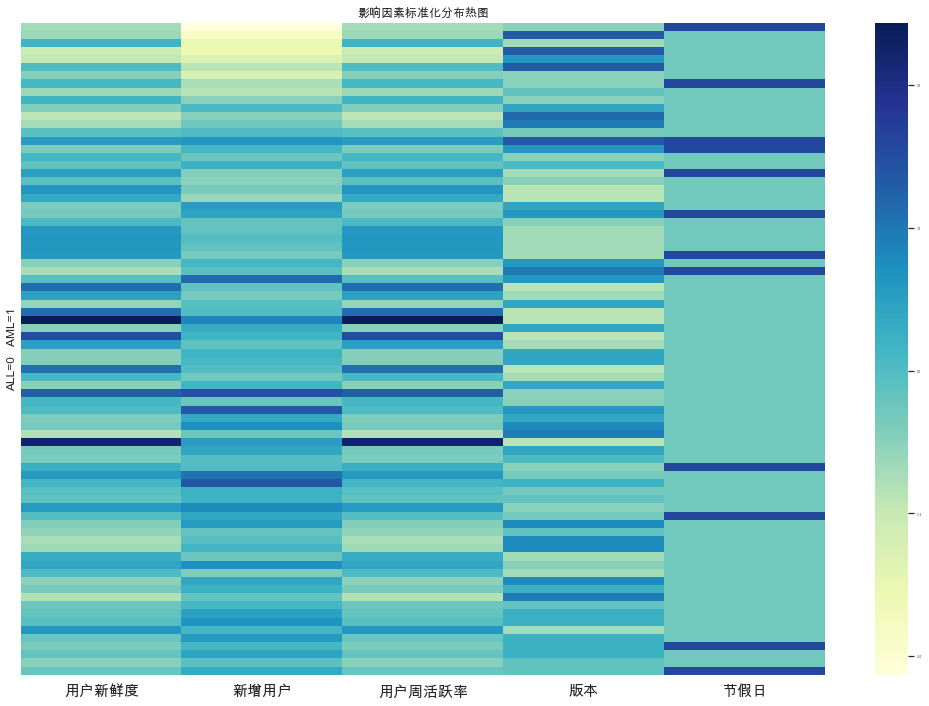

In [139]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
pylab.rcParams['figure.figsize'] = (18, 12)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# arrange Data
df_hm = regular_train[[u'启动次数',u'用户新鲜度',u'新增用户',u'用户周活跃率',u'版本',u'节假日']].sort_values(by=[u'启动次数'])
# prepare for plot
value = df_hm[[u'用户新鲜度',u'新增用户',u'用户周活跃率',u'版本',u'节假日']].values
xlabel = [u'用户新鲜度',u'新增用户',u'用户周活跃率',u'版本',u'节假日']
ylabel = df_hm['启动次数'].values
# plot
ax = sns.heatmap(value,cmap='YlGnBu',xticklabels=xlabel, yticklabels=False,annot=False)
ax.title.set_text('影响因素标准化分布热图')
ax.set_ylabel('ALL=0   AML=1')
ax.tick_params(labelsize=15)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=3) 

# 两两对比图--------------------------------------------------------------------

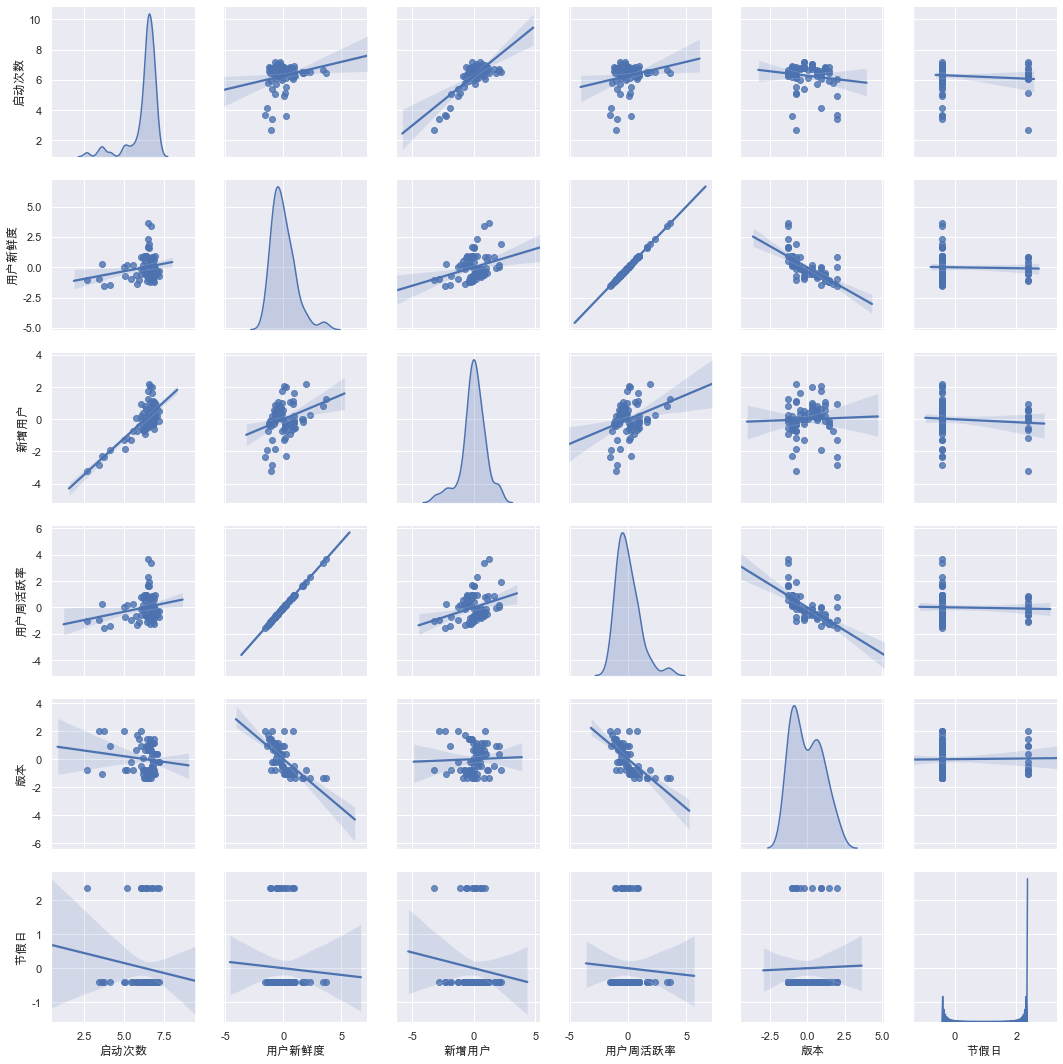

In [140]:
sns.pairplot(df_hm,kind="reg",diag_kind="kde")

# 所有因素主成分分析【7个】-------------------------------------------------------

In [141]:
#多元线性回归
#regular_train['日期']
y_train = regular_train.pop('启动次数')
x_train = regular_train.drop(['日期'],axis=1) 
#regular_train
y_test = regular_test.pop('启动次数')
x_test = regular_test.drop(['日期'],axis=1) 

In [142]:
y_train_mean=y_train.mean()
y_train= normalize_function(y_train)

In [143]:
y_test_mean=y_test.mean()
y_test= normalize_function(y_test)

In [144]:
y_train

0     0.411661
1     0.243094
2     0.249681
3     0.201585
4     0.283106
        ...   
75   -0.547094
76   -3.030549
77   -3.345149
78   -1.554740
79   -0.293273
Name: 启动次数, Length: 80, dtype: float64

In [145]:
#x_train_vals = sm.add_constant(x_train.values)
y_train_vals = y_train.values
x_train_vals = x_train.values

In [146]:
#xtest_vals = sm.add_constant(x_test.values)
y_test_vals = y_test.values
x_test_vals = x_test.values

In [147]:
#model = sm.OLS(ytrain_vals, xtrain_vals)
#fitted_model = model.fit()
#a = fitted_model.summary()
#a

In [148]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x_train)
pca.explained_variance_ratio_
#principalComponents

array([5.37181683e-01, 2.18135833e-01, 1.86794294e-01, 5.78881888e-02,
       2.41305836e-33])

In [149]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x_train)
pca.explained_variance_ratio_
#principalComponents

array([0.53718168, 0.21813583, 0.18679429, 0.05788819])

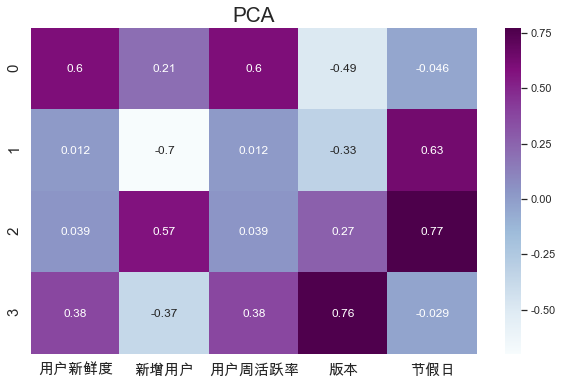

In [150]:
df_cm = pd.DataFrame(pca.components_, columns=x_train.columns)
plt.figure(figsize = (10,6))
bx = sns.heatmap(df_cm, annot=True,cmap="BuPu")
# 设置y轴的字体的大小
bx.yaxis.set_tick_params(labelsize=15)
bx.xaxis.set_tick_params(labelsize=15)
plt.title('PCA', fontsize='xx-large')


# Set y-axis label
plt.savefig('factorAnalysis.png', dpi=200)

In [151]:
pca.components_

array([[ 0.59701542,  0.20743644,  0.59701542, -0.49197762, -0.04553387],
       [ 0.0120373 , -0.70167848,  0.0120373 , -0.32528815,  0.6336759 ],
       [ 0.03932509,  0.57479713,  0.03932509,  0.26637307,  0.77172581],
       [ 0.37667125, -0.36636825,  0.37667125,  0.76235886, -0.0286497 ]])

In [152]:
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2','principal component 3','principal component 4'])
finalDf = pd.concat([principalDf, y_train], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,启动次数
0,4.858500,-0.320571,0.055527,1.254383,0.411661
1,5.288270,-0.635094,0.340759,1.297864,0.243094
2,3.497663,0.051224,-0.351486,0.677038,0.249681
3,2.622167,0.327380,-0.642720,0.331640,0.201585
4,2.610401,0.204434,-0.545947,0.237775,0.283106
...,...,...,...,...,...
75,-2.604629,-0.353723,-0.382561,0.581889,-0.547094
76,-3.335383,0.670850,-1.243564,1.212392,-3.030549
77,-2.698178,1.037996,-1.483245,1.864005,-3.345149
78,-1.191149,0.008945,-0.541765,2.068505,-1.554740


# -----------------------------------回归-----------------------------------

In [153]:
def multiple_linear_regression_score(x_test, y_test):
    # Compute predicted labels
    
    y_predicted = fitted_model.predict(x_test)
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_er = np.sum(np.square(y_test - y_predicted))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1.0 - sq_er / y_variance

    return r_squared, y_predicted

In [154]:
model = sm.OLS(y_train[0:65],principalDf[0:65])
fitted_model = model.fit()
A= fitted_model.summary()
A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   启动次数   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.615
Method:                 Least Squares   F-statistic:                              26.96
Date:                Mon, 03 Aug 2020   Prob (F-statistic):                    6.70e-13
Time:                        11:20:11   Log-Likelihood:                         -52.617
No. Observations:                  65   AIC:                                      113.2
Df Residuals:                      61   BIC:                                      121.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
principal component 1     0.2492      0.050      5.001      0.000       0.150       0.349
principal component 2    -0.5097      0.066     -7.710      0.000      -0.642      -0.378
principal component 3     0.3729      0.076      4.892      0.000       0.220       0.525
principal component 4    -0.9708      0.199     -4.868      0.000      -1.370      -0.572
==============================================================================
Omnibus:                       18.502   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.002
Skew:                          -1.233   Prob(JB):                     1.01e-05
Kurtosis:                       4.552   Cond. No.                         4.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
fitted_model.predict(principalDf[65:80])

65    1.456230
66    0.574568
67    0.432627
68    0.169821
69   -0.321345
70   -0.088467
71   -0.597799
72   -0.710503
73   -0.822836
74   -0.563454
75   -1.176395
76   -2.813914
77   -3.564235
78   -2.511623
79   -0.682135
dtype: float64

# --------------------------------------------------------------------------------------

In [156]:
from sklearn.linear_model import Lasso
lasso_regression=Lasso(alpha=0.05,max_iter=100000)
lasso_regression.fit(principalDf[0:65],y_train[0:65])
print(lasso_regression.coef_)
#print(lasso_regression.predict([[2]])) #预测结果
predict_result_lasso = lasso_regression.score(principalDf[65:80],y_train[65:80])
print(predict_result_lasso)
y_predicted=lasso_regression.predict(principalDf[65:80])

[ 0.18295965 -0.45146164  0.30162263 -0.52885628]
0.7366813409519397


In [157]:
weight_lasso=lasso_regression.coef_*pca.explained_variance_ratio_
W_lasso=np.dot(pca.components_.T,weight_lasso.T)
#W
W_lasso

array([ 0.04817479,  0.13308972,  0.04817479, -0.02464989, -0.02252236])

# --------------------------------------------------------------------------------------

In [158]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=float('{}'.format(i))).fit(principalDf[0:65],y_train[0:65])
print(ridge.coef_)
predict_result_ridge = ridge.score(principalDf[65:80],y_train[65:80])
print(predict_result_ridge)

[ 0.08533436 -0.20607788  0.12136485 -0.05103075]
0.2781293846140702


# --------------------------------------------------------------------------------------

In [159]:
date=pd.DataFrame(regular_test['日期'])
predict=pd.DataFrame(y_predicted)
date.reset_index(drop=True,inplace=True)
type(predict)
result=pd.concat([date, predict], axis=1)
result

,日期,0
0,2020/02/16~2020/02/22,1.233114
1,2020/02/23~2020/02/29,0.558756
2,2020/03/01~2020/03/07,0.426081
3,2020/03/08~2020/03/14,0.218347
4,2020/03/15~2020/03/21,-0.191371
5,2020/03/22~2020/03/28,-0.002890
6,2020/03/29~2020/04/04,-0.363538
7,2020/04/05~2020/04/11,-0.446608
8,2020/04/12~2020/04/18,-0.506963
9,2020/04/19~2020/04/25,-0.412253


# 建立指数----------------------------------------------------------------

In [160]:
regular_x=regular.copy()
regular_x=regular_x.drop(['日期'],axis=1)
regular_x=regular_x.drop(['启动次数'],axis=1)
#regular_x['活跃用户']=regular_x['活跃用户'].apply(lambda x:x/10000)
regular_x['新增用户']=regular_x['新增用户'].apply(lambda x:x/10000)


regular_x_index=regular.copy()
#regular_x=regular_x.drop(['日期'],axis=1)
regular_x_index.insert(2,'启动次数指数','0')
regular_x_index

,日期,启动次数,启动次数指数,用户新鲜度,新增用户,用户周活跃率,版本,节假日
0,2018/08/05~2018/08/11,6.629576,0,0.1700,1861,0.08500,1.0,0
1,2018/08/12~2018/08/18,6.486239,0,0.1770,2048,0.08850,1.0,0
2,2018/08/19~2018/08/25,6.491840,0,0.1440,1630,0.07200,1.0,0
3,2018/08/26~2018/09/01,6.450943,0,0.1275,1460,0.06375,1.0,0
4,2018/09/02~2018/09/08,6.520262,0,0.1265,1531,0.06325,1.0,0
...,...,...,...,...,...,...,...,...
95,2020/05/31~2020/06/06,7.528611,0,0.0635,2284,0.03175,16.0,0
96,2020/06/07~2020/06/13,7.763817,0,0.0625,2271,0.03125,16.0,0
97,2020/06/14~2020/06/20,7.681725,0,0.0575,2089,0.02875,16.0,0
98,2020/06/21~2020/06/27,6.207419,0,0.0545,1694,0.02725,17.0,0


In [163]:
regular_x

,用户新鲜度,新增用户,用户周活跃率,版本,节假日
0,0.1700,0.1861,0.08500,1.0,0
1,0.1770,0.2048,0.08850,1.0,0
2,0.1440,0.1630,0.07200,1.0,0
3,0.1275,0.1460,0.06375,1.0,0
4,0.1265,0.1531,0.06325,1.0,0
...,...,...,...,...,...
95,0.0635,0.2284,0.03175,16.0,0
96,0.0625,0.2271,0.03125,16.0,0
97,0.0575,0.2089,0.02875,16.0,0
98,0.0545,0.1694,0.02725,17.0,0


In [166]:
for i in range(len(regular['日期'])):
    regular_x_index['启动次数指数'][i]=float((np.dot(regular_x.loc[i,],W_lasso.T)
                                        +np.dot(regular_x.loc[i,],W_lasso.T)
                                        +np.dot(regular_x.loc[i,],W_lasso.T)
                                        +np.dot(regular_x.loc[i,],W_lasso.T)
                                        +np.dot(regular_x.loc[i,],W_lasso.T))/abs(sum(W_lasso)))
regular_x_index

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,日期,启动次数,启动次数指数,用户新鲜度,新增用户,用户周活跃率,版本,节假日
0,2018/08/05~2018/08/11,6.629576,0.340234,0.1700,1861,0.08500,1.0,0
1,2018/08/12~2018/08/18,6.486239,0.422383,0.1770,2048,0.08850,1.0,0
2,2018/08/19~2018/08/25,6.491840,0.204356,0.1440,1630,0.07200,1.0,0
3,2018/08/26~2018/09/01,6.450943,0.109582,0.1275,1460,0.06375,1.0,0
4,2018/09/02~2018/09/08,6.520262,0.133521,0.1265,1531,0.06325,1.0,0
...,...,...,...,...,...,...,...,...
95,2020/05/31~2020/06/06,7.528611,-9.85949,0.0635,2284,0.03175,16.0,0
96,2020/06/07~2020/06/13,7.763817,-9.86622,0.0625,2271,0.03125,16.0,0
97,2020/06/14~2020/06/20,7.681725,-9.94258,0.0575,2089,0.02875,16.0,0
98,2020/06/21~2020/06/27,6.207419,-10.7689,0.0545,1694,0.02725,17.0,0


([<matplotlib.axis.XTick at 0x1c1dd7fad0>,
 <a list of 10 Text xticklabel objects>)

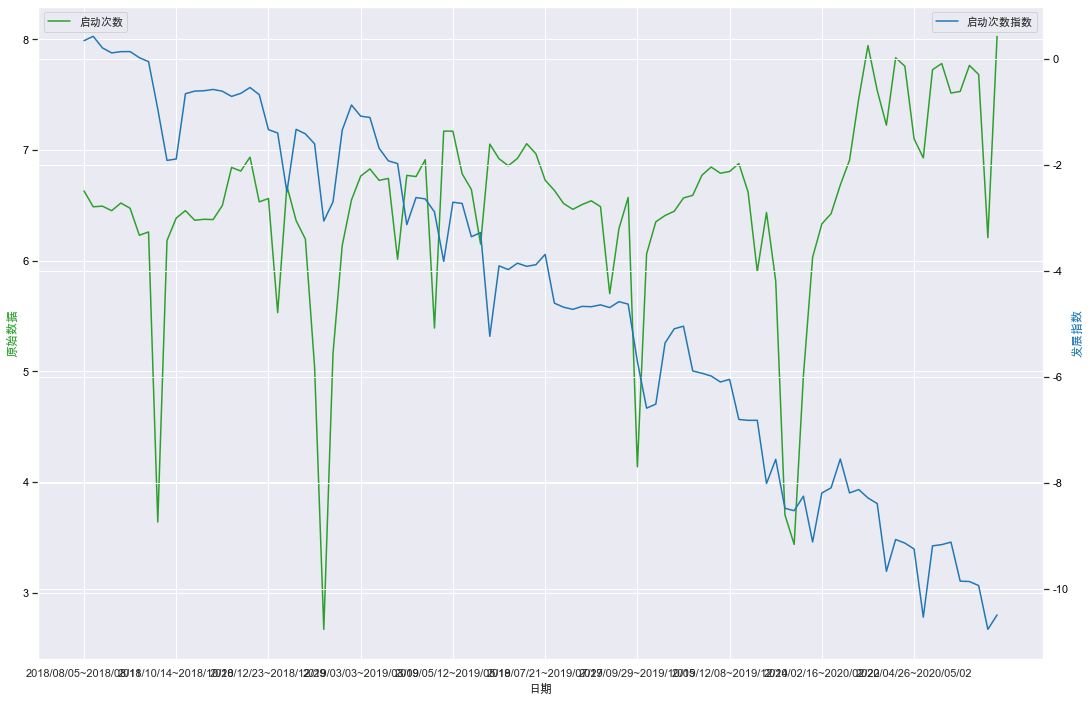

In [167]:
fig,ax1=plt.subplots()
color = 'tab:green'
ax1.set_xlabel(u'日期')
ax1.set_ylabel(u'原始数据', color=color)
ax1.plot(regular['日期'], regular['启动次数'], color=color,label=u'启动次数')
ax1.tick_params(axis='y', labelcolor='black')
plt.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(u'发展指数', color=color)  # we already handled the x-label with ax1
ax2.plot(regular_x_index['日期'], regular_x_index['启动次数指数'], color=color,label=u'启动次数指数')
ax2.tick_params(axis='y', labelcolor='black')
plt.legend(loc='upper right')
plt.xticks(range(0,100,10))

# --------------------------------------------------------------------------------------

# 剔除相关性高的因子“版本”
降低主成分个数，提升准确性

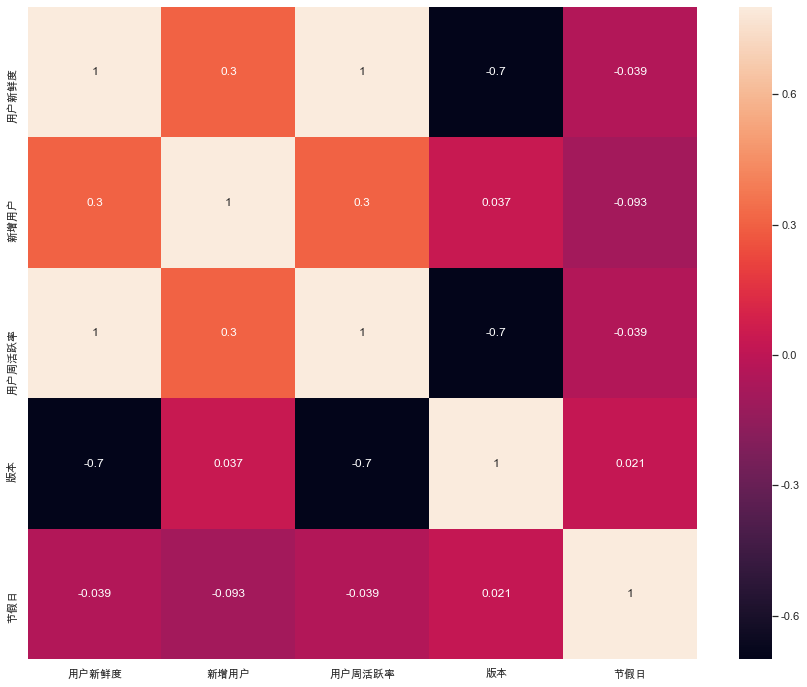

In [168]:
correlation=x_train.corr()
plt.subplots(figsize=(15,12))
cx=sns.heatmap(correlation,vmax=0.8,annot=True)
#cx.set_ylim(center)
plt.savefig("../heatmap")

In [169]:
#regular_train['日期']
#y_train_small = regular_train.pop('启动次数')
#x_train_small = x_train.drop(['日期'],axis=1) 
x_train_small = x_train.drop(['用户新鲜度'],axis=1) 


#regular_train
#y_test_small = regular_test.pop('启动次数')
#x_test_small = regular_test.drop(['日期'],axis=1) 
#y_test_small = y_train.drop(['版本'],axis=1) 

In [170]:
x_train_small

,新增用户,用户周活跃率,版本,节假日
0,0.805119,3.371414,-1.314915,-0.417450
1,1.262983,3.651802,-1.314915,-0.417450
2,0.239522,2.329974,-1.314915,-0.417450
3,-0.176718,1.669059,-1.314915,-0.417450
4,-0.002877,1.629004,-1.314915,-0.417450
...,...,...,...,...
75,-0.725176,-1.355125,1.738185,-0.417450
76,-2.321580,-1.575430,2.015740,-0.417450
77,-2.823517,-0.954571,2.015740,-0.417450
78,-1.322603,0.046815,2.015740,-0.417450


In [171]:
from sklearn.decomposition import PCA
pca_small = PCA(n_components=4)
principalComponents_small = pca_small.fit_transform(x_train_small)
pca_small.explained_variance_ratio_
#principalComponents
R1=pca_small.explained_variance_ratio_.reshape(1,4)
R1=pd.DataFrame(R1)
new_col = ['主成分1','主成分2','主成分3','主成分4']
R1.columns = new_col
R1

,主成分1,主成分2,主成分3,主成分4
0,0.439112,0.272584,0.232795,0.055509


In [172]:
pca_small.components_

array([[ 0.26498388,  0.70989652, -0.64665164, -0.08759072],
       [-0.69843486,  0.02613775, -0.34255009,  0.62782561],
       [ 0.58976511,  0.07602936,  0.22040815,  0.7731862 ],
       [-0.30683776,  0.69970228,  0.64491964, -0.01859999]])

In [173]:
df_cm.index=['主成分1','主成分2','主成分3','主成分4']

In [174]:
df_cm

,用户新鲜度,新增用户,用户周活跃率,版本,节假日
主成分1,0.597015,0.207436,0.597015,-0.491978,-0.045534
主成分2,0.012037,-0.701678,0.012037,-0.325288,0.633676
主成分3,0.039325,0.574797,0.039325,0.266373,0.771726
主成分4,0.376671,-0.366368,0.376671,0.762359,-0.028650


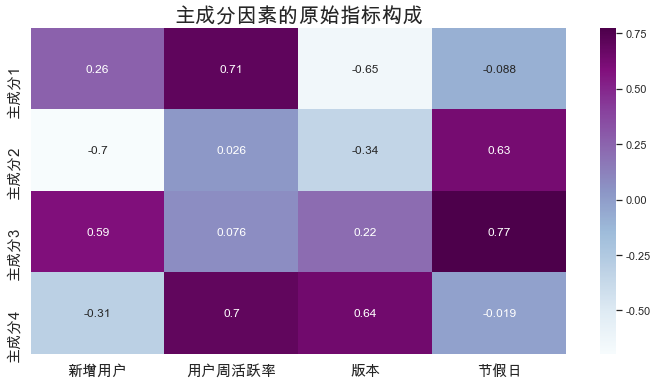

In [175]:
df_cm = pd.DataFrame(pca_small.components_, columns=x_train_small.columns)
df_cm.index=['主成分1','主成分2','主成分3','主成分4']
plt.figure(figsize = (12,6))
bx = sns.heatmap(df_cm, annot=True,cmap="BuPu")
# 设置y轴的字体的大小
bx.yaxis.set_tick_params(labelsize=15)
bx.xaxis.set_tick_params(labelsize=15)
#bx.axes.set_ylabel('主成分1','主成分2','主成分3','主成分4')
plt.title('主成分因素的原始指标构成', fontsize='xx-large')


# Set y-axis label
plt.savefig('factorAnalysis.png', dpi=200)

In [176]:
principalDf_small = pd.DataFrame(data=principalComponents_small, columns=['主成分 1', '主成分 2','主成分 3','主成分 4'])
finalDf_small = pd.concat([principalDf_small, y_train], axis = 1)
finalDf_small

,主成分 1,主成分 2,主成分 3,主成分 4,启动次数
0,3.493555,-0.285864,0.118573,1.271696,0.411661
1,3.813928,-0.598323,0.409923,1.327394,0.243094
2,2.604366,0.081948,-0.294177,0.716544,0.249681
3,2.024888,0.355390,-0.589910,0.381819,0.201585
4,2.042518,0.232926,-0.490429,0.300451,0.283106
...,...,...,...,...,...
75,-2.241594,-0.386433,-0.470369,0.403082,-0.547094
76,-3.000490,0.627716,-1.367447,0.917772,-3.030549
77,-2.692750,0.994514,-1.616268,1.506201,-3.345149
78,-1.584152,-0.027602,-0.654947,1.746336,-1.554740


In [177]:
from sklearn.linear_model import Lasso
lasso_regression_small=Lasso(alpha=0.01,max_iter=100000)
lasso_regression_small.fit(principalDf_small[0:60],y_train[0:60])
print(lasso_regression_small.coef_)
#print(lasso_regression.predict([[2]])) #预测结果
predict_result_lasso_small = lasso_regression_small.score(principalDf_small[60:80],y_train[60:80])
print(predict_result_lasso_small)
y_predicted_small=lasso_regression_small.predict(principalDf_small[60:80])

[ 0.3404831  -0.4996364   0.38819781 -0.93225177]
0.669287167702783


In [178]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=float('{}'.format(i))).fit(principalDf[0:60],y_train[0:60])
print(ridge.coef_)
predict_result_ridge = ridge.score(principalDf_small[60:80],y_train[60:80])
print(predict_result_ridge)

[ 0.05376472 -0.20051573  0.11104181 -0.03393032]
0.16260705195810865


正则化是结构风险（损失函数+正则化项）最小化策略的体现，是在经验风险（平均损失函数）上加一个正则化项。
正则化的作用就是选择经验风险和模型复杂度同时较小的模型。

防止过拟合的原理：正则化项一般是模型复杂度的单调递增函数，而经验风险负责最小化误差，使模型偏差尽可能小经验风险越小，
模型越复杂，正则化项的值越大。要使正则化项也很小，那么模型复杂程度受到限制，因此就能有效地防止过拟合。


In [179]:
predict_small=pd.DataFrame(y_predicted_small)
type(predict_small)
result_small=pd.concat([date, predict_small], axis=1)
result_small

,日期,0
0,2020/02/16~2020/02/22,-1.837214
1,2020/02/23~2020/02/29,-0.236622
2,2020/03/01~2020/03/07,0.169256
3,2020/03/08~2020/03/14,-0.104284
4,2020/03/15~2020/03/21,1.144467
5,2020/03/22~2020/03/28,1.370451
6,2020/03/29~2020/04/04,0.510138
7,2020/04/05~2020/04/11,0.369463
8,2020/04/12~2020/04/18,0.112223
9,2020/04/19~2020/04/25,-0.370365


In [193]:
regular_x_small=regular.copy()
regular_x_small=regular_x_small.drop(['日期'],axis=1)
regular_x_small=regular_x_small.drop(['启动次数'],axis=1)
regular_x_small=regular_x_small.drop(['用户新鲜度'],axis=1)
#regular_x_small['活跃用户']=regular_x_small['活跃用户'].apply(lambda x:x/10000)
regular_x_small['新增用户']=regular_x_small['新增用户'].apply(lambda x:x/10000)


regular_x_small_index=regular.copy()
#regular_x=regular_x.drop(['日期'],axis=1)
regular_x_small_index.insert(2,'启动次数指数','0')
regular_x_small_index
#regular_x_small

,日期,启动次数,启动次数指数,用户新鲜度,新增用户,用户周活跃率,版本,节假日
0,2018/08/05~2018/08/11,6.629576,0,0.1700,1861,0.08500,1.0,0
1,2018/08/12~2018/08/18,6.486239,0,0.1770,2048,0.08850,1.0,0
2,2018/08/19~2018/08/25,6.491840,0,0.1440,1630,0.07200,1.0,0
3,2018/08/26~2018/09/01,6.450943,0,0.1275,1460,0.06375,1.0,0
4,2018/09/02~2018/09/08,6.520262,0,0.1265,1531,0.06325,1.0,0
...,...,...,...,...,...,...,...,...
95,2020/05/31~2020/06/06,7.528611,0,0.0635,2284,0.03175,16.0,0
96,2020/06/07~2020/06/13,7.763817,0,0.0625,2271,0.03125,16.0,0
97,2020/06/14~2020/06/20,7.681725,0,0.0575,2089,0.02875,16.0,0
98,2020/06/21~2020/06/27,6.207419,0,0.0545,1694,0.02725,17.0,0


In [194]:
weight_lasso_small=lasso_regression_small.coef_*pca_small.explained_variance_ratio_
W_lasso_small=np.dot(pca_small.components_.T,weight_lasso_small.T)
R=W_lasso_small.reshape(1,4)
R=pd.DataFrame(R)
new_col = ['新增用户','用户周活跃率','版本','节假日']
R.columns = new_col
R

,新增用户,用户周活跃率,版本,节假日
0,0.203915,0.073239,-0.063483,-0.027765


In [195]:
np.dot(R,regular_x_small.loc[99].T)

array([-1.02813328])

In [196]:
from pyecharts import Radar 
radar = Radar("原始特征权重", "剔除相关性高的因子后",width=40000,height=24000,title_pos="center",title_top=30) 
radar_data1 = [[0.170882,0.06023,0.13376,0.012693,0.066733,0.092902]] 
radar.render("原始特征权重.html")
c_schema= [{"name": "活跃用户", "max": 0.2, "min": -0.1},
           {"name": "新增用户", "max": 0.2, "min": -0.1},
           {"name": "用户周活跃率", "max": 0.2, "min": -0.1},
           {"name": "版本", "max": 0.2, "min": -0.1},
           {"name": "节假日",  "max": 0.2, "min": -0.1},
          {"name": "疫情",  "max": 0.2, "min": -0.1}]
radar = Radar()
radar.config(c_schema=c_schema,radar_text_size=20)
radar.add("原始特征权重",radar_data1,legend_text_size=20,line_width=3,area_capacity=0.4)
radar.render("原始特征权重.html")

In [184]:
for i in range(len(regular['日期'])):
    regular_x_small_index['启动次数指数'][i]=float(np.dot(R,regular_x_small.loc[i].T))/sum(W_lasso_small)
regular_x_small_index

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,日期,启动次数,启动次数指数,用户新鲜度,新增用户,用户周活跃率,版本,节假日
0,2018/08/05~2018/08/11,6.629576,-0.103865,0.1700,1861,0.08500,1.0,0
1,2018/08/12~2018/08/18,6.486239,-0.081975,0.1770,2048,0.08850,1.0,0
2,2018/08/19~2018/08/25,6.491840,-0.134325,0.1440,1630,0.07200,1.0,0
3,2018/08/26~2018/09/01,6.450943,-0.156222,0.1275,1460,0.06375,1.0,0
4,2018/09/02~2018/09/08,6.520262,-0.148631,0.1265,1531,0.06325,1.0,0
...,...,...,...,...,...,...,...,...
95,2020/05/31~2020/06/06,7.528611,-5.20064,0.0635,2284,0.03175,16.0,0
96,2020/06/07~2020/06/13,7.763817,-5.20226,0.0625,2271,0.03125,16.0,0
97,2020/06/14~2020/06/20,7.681725,-5.22321,0.0575,2089,0.02875,16.0,0
98,2020/06/21~2020/06/27,6.207419,-5.60861,0.0545,1694,0.02725,17.0,0


In [204]:
for i in range(len(regular['日期'])):
    regular_x_small_index['启动次数指数'][i]=float(np.dot(R,regular_x_small.loc[i].T)
                                        +np.dot(R,regular_x_small.loc[i].T)
                                        +np.dot(R,regular_x_small.loc[i].T)
                                        +np.dot(R,regular_x_small.loc[i].T)/sum(W_lasso))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [205]:
regular_x_small_index

,日期,启动次数,启动次数指数,用户新鲜度,新增用户,用户周活跃率,版本,节假日
0,2018/08/05~2018/08/11,6.629576,-0.163867,0.1700,1861,0.08500,1.0,0
1,2018/08/12~2018/08/18,6.486239,-0.129331,0.1770,2048,0.08850,1.0,0
2,2018/08/19~2018/08/25,6.491840,-0.211922,0.1440,1630,0.07200,1.0,0
3,2018/08/26~2018/09/01,6.450943,-0.246468,0.1275,1460,0.06375,1.0,0
4,2018/09/02~2018/09/08,6.520262,-0.234493,0.1265,1531,0.06325,1.0,0
...,...,...,...,...,...,...,...,...
95,2020/05/31~2020/06/06,7.528611,-8.20498,0.0635,2284,0.03175,16.0,0
96,2020/06/07~2020/06/13,7.763817,-8.20754,0.0625,2271,0.03125,16.0,0
97,2020/06/14~2020/06/20,7.681725,-8.24059,0.0575,2089,0.02875,16.0,0
98,2020/06/21~2020/06/27,6.207419,-8.84862,0.0545,1694,0.02725,17.0,0


In [206]:
regular_x_small_index.to_csv('疫情指数.csv',index=False)

In [207]:
regular_x_small

,新增用户,用户周活跃率,版本,节假日
0,0.1861,0.08500,1.0,0
1,0.2048,0.08850,1.0,0
2,0.1630,0.07200,1.0,0
3,0.1460,0.06375,1.0,0
4,0.1531,0.06325,1.0,0
...,...,...,...,...
95,0.2284,0.03175,16.0,0
96,0.2271,0.03125,16.0,0
97,0.2089,0.02875,16.0,0
98,0.1694,0.02725,17.0,0


In [208]:
from pyecharts import Line
from pyecharts import Overlap
line1=Line("发展指数", '2018/08/07-2020/06/15', width=1000, height=500,title_pos="center",title_top=30)
line1.add('启动次数',  regular_x_small_index['日期'],regular_x_small_index['启动次数'],is_datazoom_show=True,is_xaxis_boundarygap = True)
line2=Line('', width=1000, height=500,title_pos="center",title_top=30)
line2.add('环境影响评价行业指数',  regular_x_small_index['日期'],regular_x_small_index['启动次数指数'],is_datazoom_show=True,is_xaxis_boundarygap = True)
line2.render('线——有疫情.html')
overlap=Overlap("环境影响评价行业指数与启动次数",width=360,height=500)
overlap.add(line1)
overlap.add(line2)
overlap.render('环境影响评价行业指数与启动次数.html')

In [209]:
line=Line("阶段性EIA指数情况", '疫情期间拐点情况2020/01/019-2020/03/28', width=1000, height=500,title_pos="center",title_top=30)
line.add('发展指数',  regular_x_small_index['日期'][76:86],regular_x_small_index['启动次数指数'][76:86],is_datazoom_show=True,is_xaxis_boundarygap = True,is_label_show=True)
#line.add('复工指数',  regular_x_small_index ['日期'][76:86],regular_x_small_fugong_index ['启动次数指数'],is_datazoom_show=True,is_xaxis_boundarygap = True)
line.render('线11111——复工有疫情.html')    

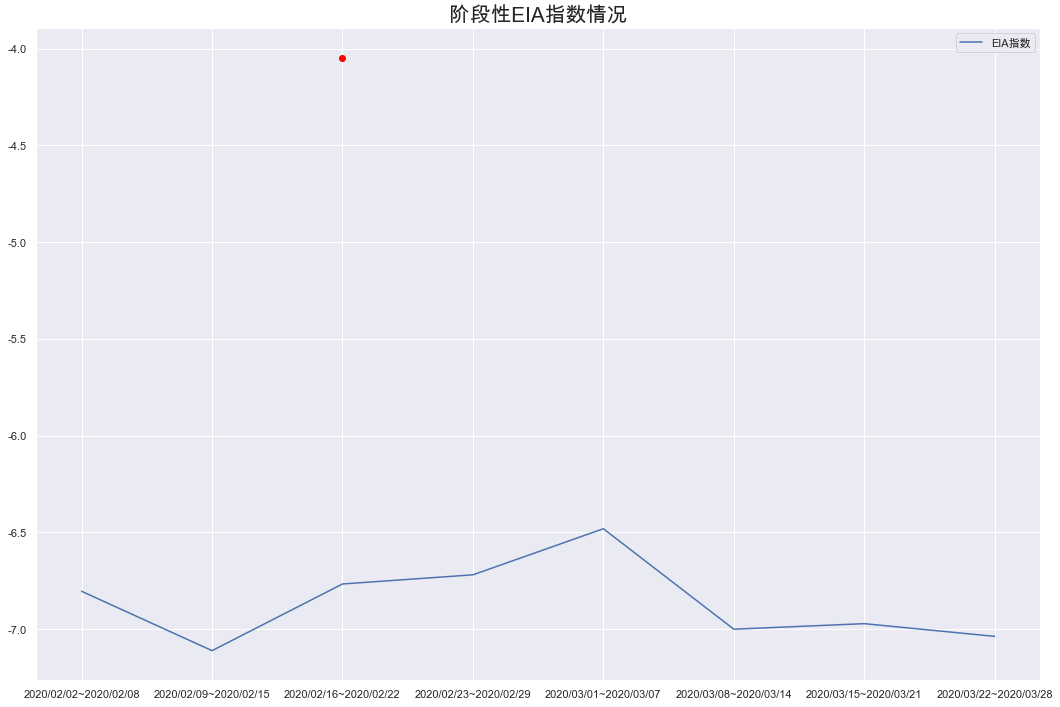

In [210]:
plt.plot(regular['日期'][78:86], regular_x_small_index['启动次数指数'][78:86],label='EIA指数')
plt.legend(loc='best')
#plt.xticks(range(0,8,2))
plt.title('阶段性EIA指数情况',fontsize='xx-large')
plt.scatter(x='2020/02/16~2020/02/22', y=-4.05,  color='red', alpha=1, marker='o')

([<matplotlib.axis.XTick at 0x1c1c94efd0>,
 <a list of 7 Text xticklabel objects>)

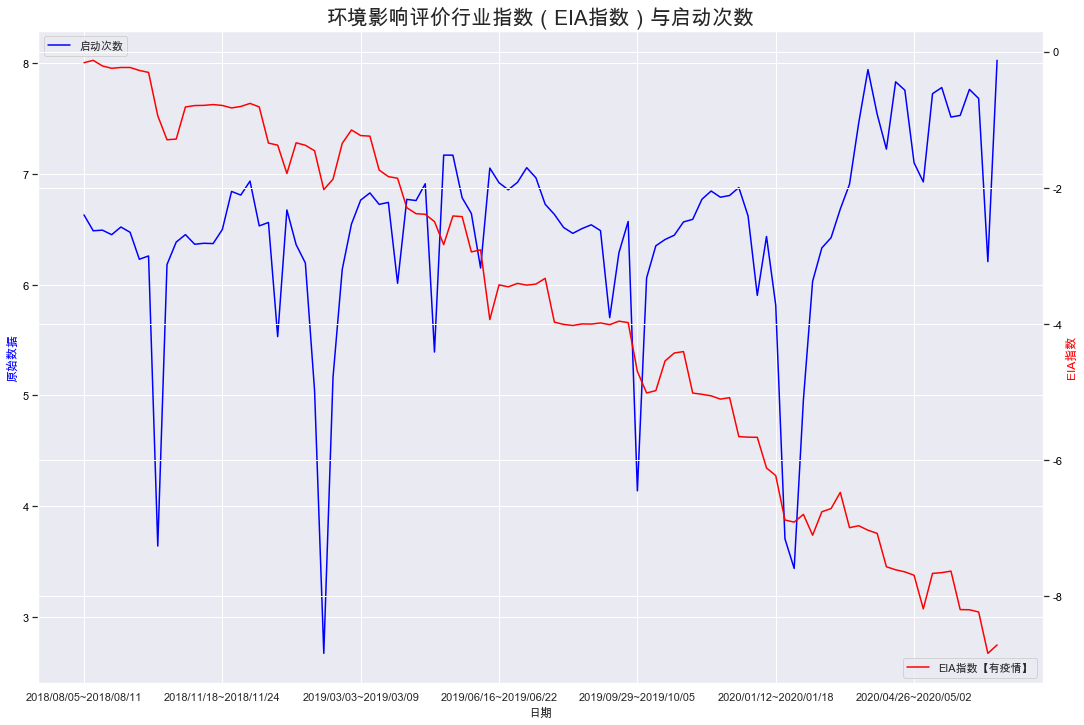

In [211]:
fig,ax1=plt.subplots()
#plt.figure(figsize=(00,600))
color = 'tab:green'
ax1.set_xlabel(u'日期')
ax1.set_ylabel(u'原始数据', color='blue')
ax1.plot(regular['日期'], regular['启动次数'], color='blue',label=u'启动次数')
ax1.tick_params(axis='y', labelcolor='black')
plt.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(u'EIA指数', color='red')  # we already handled the x-label with ax1
ax2.plot(regular['日期'], regular_x_small_index['启动次数指数'], color='red',label=u'EIA指数【有疫情】')
ax2.tick_params(axis='y', labelcolor='black')
plt.legend(loc='lower right')
plt.title('环境影响评价行业指数（EIA指数）与启动次数',fontsize='xx-large')
plt.xticks(range(0,99,15))

# --------------------------------------------------------------------------------------

In [108]:
regular_x_small_com=regular_x_small.copy()
for i in range(len(regular_x_small_com)):
    regular_x_small_com['疫情']=0
    regular_x_small_com['新增用户']=0

In [109]:
regular_x_small_com

,新增用户,用户周活跃率,版本,节假日,疫情
0,0,0.08500,1.0,0,0
1,0,0.08850,1.0,0,0
2,0,0.07200,1.0,0,0
3,0,0.06375,1.0,0,0
4,0,0.06325,1.0,0,0
...,...,...,...,...,...
95,0,0.03175,16.0,0,0
96,0,0.03125,16.0,0,0
97,0,0.02875,16.0,0,0
98,0,0.02725,17.0,0,0


In [68]:
regular_x_small_com.to_csv('无疫情.csv',index=False)

In [69]:
regular_x_small.to_csv('有疫情.csv',index=False)

In [70]:
regular_x_small

,活跃用户,新增用户,用户周活跃率,版本,节假日,疫情
0,1.0982,0.1861,0.08500,1.0,0,0.0
1,1.1445,0.2048,0.08850,1.0,0,0.0
2,1.1213,0.1630,0.07200,1.0,0,0.0
3,1.1405,0.1460,0.06375,1.0,0,0.0
4,1.1894,0.1531,0.06325,1.0,0,0.0
...,...,...,...,...,...,...
95,3.4602,0.2284,0.03175,16.0,0,0.3
96,3.4613,0.2271,0.03125,16.0,0,0.3
97,3.5196,0.2089,0.02875,16.0,0,0.3
98,2.9761,0.1694,0.02725,17.0,0,0.5


In [71]:
regular_x_small_com_index=regular_x_small_index.copy()
for i in range(len(regular['日期'])):
    regular_x_small_com_index['启动次数指数'][i]=float((np.dot(regular_x_small_com.loc[i,],R.T))/abs(sum(W_lasso_small)))
regular_x_small_com_index

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,日期,启动次数,启动次数指数,活跃用户,用户新鲜度,新增用户,用户周活跃率,版本,节假日,疫情
0,2018/08/05~2018/08/11,72806,1.16182,10982,0.1700,1861,0.08500,1.0,0,0.0
1,2018/08/12~2018/08/18,74235,1.19455,11445,0.1770,2048,0.08850,1.0,0,0.0
2,2018/08/19~2018/08/25,72793,1.18274,11213,0.1440,1630,0.07200,1.0,0,0.0
3,2018/08/26~2018/09/01,73573,1.19934,11405,0.1275,1460,0.06375,1.0,0,0.0
4,2018/09/02~2018/09/08,77552,1.23521,11894,0.1265,1531,0.06325,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,2020/05/31~2020/06/06,260505,8.69677,34602,0.0635,2284,0.03175,16.0,0,0.3
96,2020/06/07~2020/06/13,268729,8.69773,34613,0.0625,2271,0.03125,16.0,0,0.3
97,2020/06/14~2020/06/20,270366,8.74109,35196,0.0575,2089,0.02875,16.0,0,0.3
98,2020/06/21~2020/06/27,184739,8.73082,29761,0.0545,1694,0.02725,17.0,0,0.5


([<matplotlib.axis.XTick at 0x1c219f5d10>,
 <a list of 8 Text xticklabel objects>)

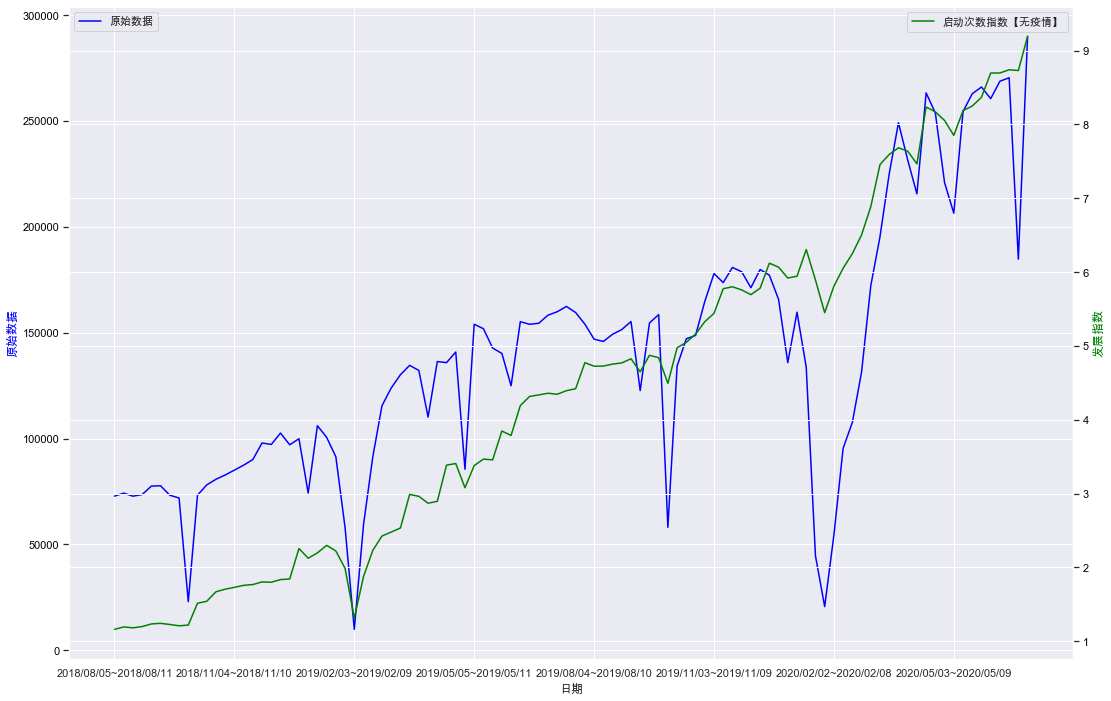

In [72]:
fig,ax1=plt.subplots()
color = 'tab:green'
ax1.set_xlabel(u'日期')
ax1.set_ylabel(u'原始数据', color='blue')
ax1.plot(regular['日期'], regular['启动次数'], color='blue',label=u'原始数据')
ax1.tick_params(axis='y', labelcolor='black')
plt.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(u'发展指数', color='green')  # we already handled the x-label with ax1
ax2.plot(regular['日期'], regular_x_small_com_index['启动次数指数'], color='green',label=u'启动次数指数【无疫情】')
ax2.tick_params(axis='y', labelcolor='black')
plt.legend(loc='upper right')
plt.xticks(range(0,98,13))

# 有疫情与无疫情对比----------------------------------------------------------------

([<matplotlib.axis.XTick at 0x1c21afe6d0>,
 <a list of 8 Text xticklabel objects>)

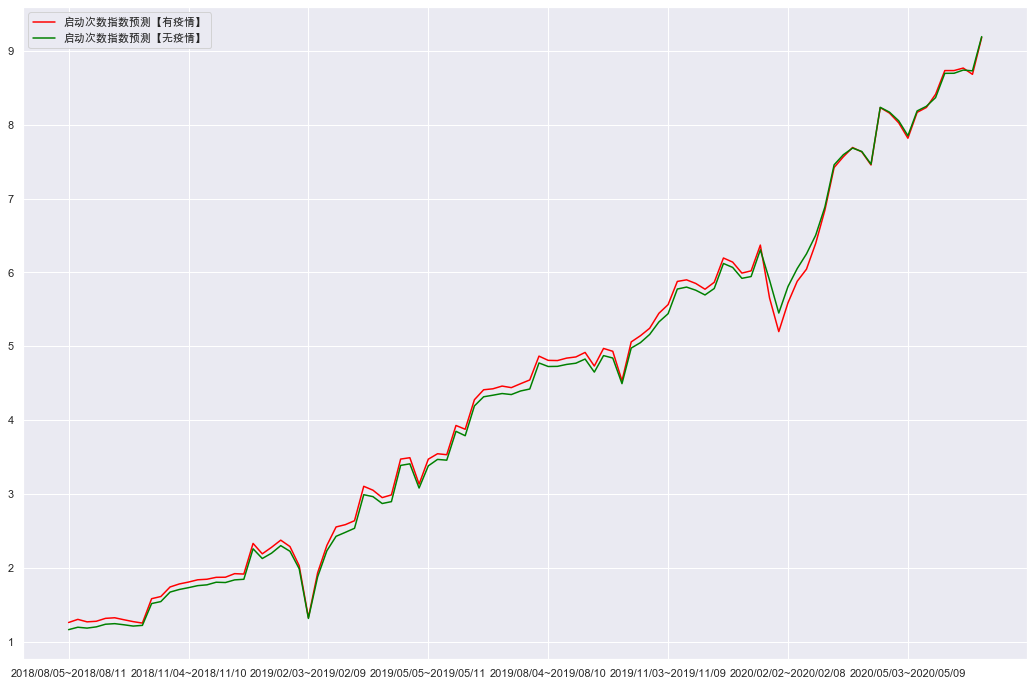

In [73]:
plt.figure()
plt.plot(regular['日期'],regular_x_small_index['启动次数指数'],color='red',label=u'启动次数指数预测【有疫情】')
plt.plot(regular['日期'],regular_x_small_com_index['启动次数指数'],color='green',label=u'启动次数指数预测【无疫情】')
plt.legend()
plt.xticks(range(0,98,13))

In [74]:
line=Line("有无疫情发展指数对比", '2020/01/04-2020/06/15', width=1000, height=500,title_pos="center",title_top=30)
line.add('发展指数预测【无疫情】',  regular['日期'],regular_x_small_com_index['启动次数指数'],mark_point=[{"coord": ["2020/04/12~2020/04/18", 40.9]}],is_datazoom_show=True,is_xaxis_boundarygap = True,is_fill=True,line_opacity=0.9,area_opacity=0.6)
line.add('发展指数【有疫情】',  regular['日期'],regular_x_small_index['启动次数指数'],is_datazoom_show=True,is_xaxis_boundarygap = True,is_fill=True,line_opacity=0.9,area_opacity=0.6,label_color=['#4682B4'])
line.render('线——有无对比.html')    

In [75]:
regular_x_small_index['启动次数指数'][99]#有疫情

9.182616196143684

In [76]:
regular_x_small_com_index['启动次数指数'][99]#无疫情

9.194002563377781

In [77]:
regular_x_small_index.loc[92,]

日期        2020/05/10~2020/05/16
启动次数                     254368
启动次数指数                  8.16841
活跃用户                      32928
用户新鲜度                     0.067
新增用户                       2238
用户周活跃率                   0.0335
版本                           15
节假日                           0
疫情                          0.5
Name: 92, dtype: object

In [78]:
regular_x_small_index.loc[93,]

日期        2020/05/17~2020/05/23
启动次数                     262840
启动次数指数                  8.23429
活跃用户                      33782
用户新鲜度                    0.0665
新增用户                       2304
用户周活跃率                  0.03325
版本                           15
节假日                           0
疫情                          0.5
Name: 93, dtype: object

In [79]:
regular_x_small_index.to_csv('有疫情指数')

In [80]:
regular_x_small_com_index.to_csv('无疫情指数')

# --------------------------------------------------------------------------------------

In [81]:
x_train_small

,活跃用户,新增用户,用户周活跃率,版本,节假日,疫情
0,-1.282511,0.805119,3.371414,-1.314915,-0.417450,-0.227977
1,-1.200668,1.262983,3.651802,-1.314915,-0.417450,-0.227977
2,-1.241678,0.239522,2.329974,-1.314915,-0.417450,-0.227977
3,-1.207739,-0.176718,1.669059,-1.314915,-0.417450,-0.227977
4,-1.121300,-0.002877,1.629004,-1.314915,-0.417450,-0.227977
...,...,...,...,...,...,...
75,0.842229,-0.725176,-1.355125,1.738185,-0.417450,-0.227977
76,-1.091956,-2.321580,-1.575430,2.015740,-0.417450,4.331570
77,-2.160867,-2.823517,-0.954571,2.015740,-0.417450,4.331570
78,-1.281804,-1.322603,0.046815,2.015740,-0.417450,4.331570


In [82]:
x_train_normal=x_train_small.copy()
#x_train_normal=x_train_normal.drop(['疫情'],axis=1)

In [83]:
x_train_normal

,活跃用户,新增用户,用户周活跃率,版本,节假日,疫情
0,-1.282511,0.805119,3.371414,-1.314915,-0.417450,-0.227977
1,-1.200668,1.262983,3.651802,-1.314915,-0.417450,-0.227977
2,-1.241678,0.239522,2.329974,-1.314915,-0.417450,-0.227977
3,-1.207739,-0.176718,1.669059,-1.314915,-0.417450,-0.227977
4,-1.121300,-0.002877,1.629004,-1.314915,-0.417450,-0.227977
...,...,...,...,...,...,...
75,0.842229,-0.725176,-1.355125,1.738185,-0.417450,-0.227977
76,-1.091956,-2.321580,-1.575430,2.015740,-0.417450,4.331570
77,-2.160867,-2.823517,-0.954571,2.015740,-0.417450,4.331570
78,-1.281804,-1.322603,0.046815,2.015740,-0.417450,4.331570


In [84]:
from sklearn.decomposition import PCA
pca_normal = PCA(n_components=4)
principalComponents_normal = pca_normal.fit_transform(x_train_normal)
pca_normal.explained_variance_ratio_
#principalComponents
R1=pca_normal.explained_variance_ratio_.reshape(1,4)
R1=pd.DataFrame(R1)
new_col = ['主成分1','主成分2','主成分3','主成分4']
R1.columns = new_col
R1

,主成分1,主成分2,主成分3,主成分4
0,0.375307,0.301775,0.162685,0.143637


In [85]:
type(pca_normal.explained_variance_ratio_)

numpy.ndarray

In [86]:
pca_normal.explained_variance_ratio_[0:3]

array([0.375307  , 0.30177476, 0.16268524])

In [87]:
principalDf_normal = pd.DataFrame(data=principalComponents_normal, columns=['主成分 1', '主成分 2','主成分 3','主成分 4'])
finalDf_normal = pd.concat([principalDf_normal, y_train], axis = 1)
finalDf_normal=finalDf_normal.drop(['主成分 4'],axis=1)
#finalDf_normal['主成分 4']='0'

In [88]:
principalDf_normal=principalDf_normal.drop(['主成分 4'],axis=1)

In [89]:
#principalDf_normal['主成分 4']='0'

In [90]:
from sklearn.linear_model import Lasso
lasso_regression_normal=Lasso(alpha=0.01,max_iter=100000)
lasso_regression_normal.fit(principalDf_normal[0:56],y_train[0:56])
print(lasso_regression_normal.coef_)
#print(lasso_regression.predict([[2]])) #预测结果
predict_result_lasso_normal = lasso_regression_normal.score(principalDf_normal[54:68],y_train[54:68])
print(predict_result_lasso_normal)
y_predicted_normal=lasso_regression_normal.predict(principalDf_normal[56:65])
predict_normal=pd.DataFrame(y_predicted_normal)
type(predict_normal)

[-0.5257422  -0.45812085  0.0945715 ]
0.7134928215337117


pandas.core.frame.DataFrame

In [91]:
result_normal=pd.concat([date, predict_normal], axis=1)
result_normal
regular_x_normal=regular.copy()
regular_x_normal=regular_x_normal.drop(['日期'],axis=1)
regular_x_normal=regular_x_normal.drop(['启动次数'],axis=1)
regular_x_normal=regular_x_normal.drop(['新增用户'],axis=1)
#regular_x_normal=regular_x_normal.drop(['疫情'],axis=1)
regular_x_normal['活跃用户']=regular_x_normal['活跃用户'].apply(lambda x:x/10000)
#regular_x_normal['新增用户']=regular_x_normal['新增用户'].apply(lambda x:x/10000)

In [92]:
regular_x_normal_index=regular.copy()
#regular_x=regular_x.drop(['日期'],axis=1)
regular_x_normal_index.insert(2,'启动次数指数','0')
regular_x_normal_index
#regular_x_normal

weight_lasso_normal=lasso_regression_normal.coef_*pca_normal.explained_variance_ratio_[0:3]
W_lasso_normal=np.dot(pca_normal.components_[0:3].T,weight_lasso_normal.T)
R=W_lasso_normal.reshape(1,6)
R=pd.DataFrame(R)
new_col = ['活跃用户','用户新鲜度','用户周活跃率','版本','节假日','疫情']
R.columns = new_col
R

from pyecharts import Radar 
radar = Radar("原始特征权重", "剔除相关性高的因子后",width=40000,height=24000,title_pos="center",title_top=30) 
radar_data1 = [[0.170882,0.06023,0.13376,0.012693,0.066733,0.092902]] 
radar.render("原始特征权重.html")
c_schema= [{"name": "活跃用户", "max": 0.2, "min": -0.1},
           {"name": "用户新鲜度", "max": 0.2, "min": -0.1},
           {"name": "用户周活跃率", "max": 0.2, "min": -0.1},
           {"name": "版本", "max": 0.2, "min": -0.1},
           {"name": "节假日",  "max": 0.2, "min": -0.1},
          {"name": "疫情",  "max": 0.2, "min": -0.1}]
radar = Radar()
radar.config(c_schema=c_schema,radar_text_size=20)
radar.add("原始特征权重",radar_data1,legend_text_size=20,line_width=3,area_capacity=0.4)
radar.render("原始特征权重.html")


In [93]:
R

,活跃用户,用户新鲜度,用户周活跃率,版本,节假日,疫情
0,0.166094,0.11625,-0.073174,0.090342,-0.012826,-0.059168


In [113]:
sum(W_lasso_normal)

NameError: name 'W_lasso_normal' is not defined

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


([<matplotlib.axis.XTick at 0x1c21a56510>,
 <a list of 8 Text xticklabel objects>)

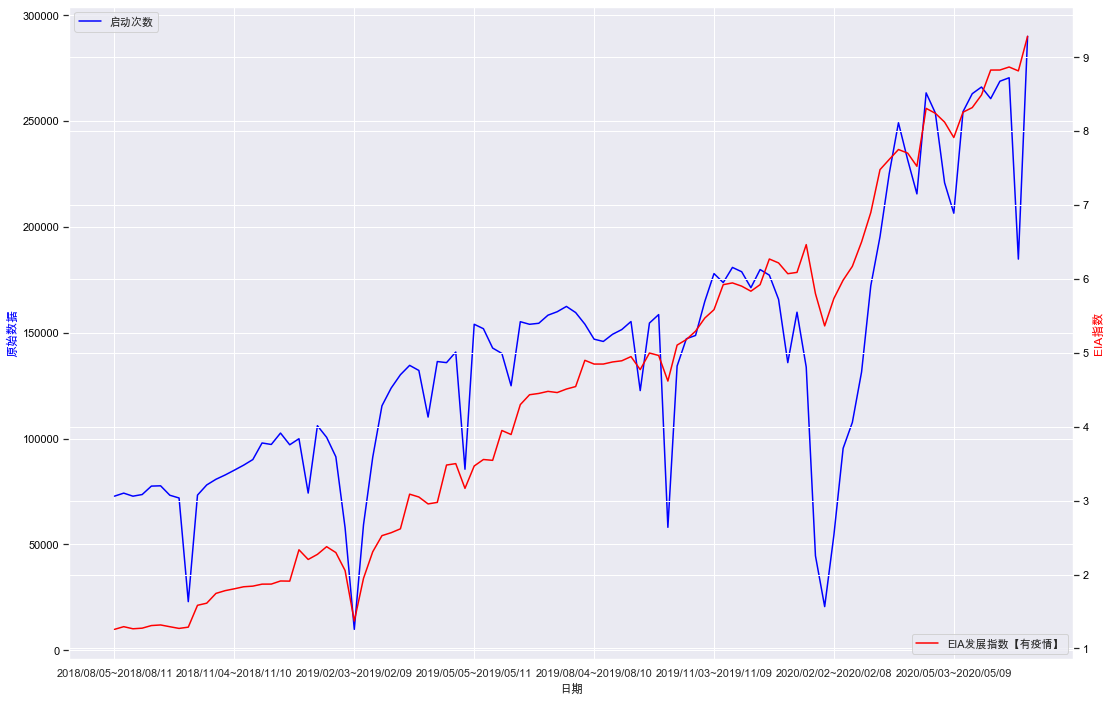

In [95]:
for i in range(len(regular['日期'])):
    regular_x_normal_index['启动次数指数'][i]=float(np.dot(regular_x_normal.loc[i],R.T))/sum(W_lasso_normal)
regular_x_normal_index

fig,ax1=plt.subplots()
#plt.figure(figsize=(1400,600))
color = 'tab:green'
ax1.set_xlabel(u'日期')
ax1.set_ylabel(u'原始数据', color='blue')
ax1.plot(regular['日期'], regular['启动次数'], color='blue',label=u'启动次数')
ax1.tick_params(axis='y', labelcolor='black')
plt.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(u'EIA指数', color='red')  # we already handled the x-label with ax1
ax2.plot(regular['日期'], regular_x_normal_index['启动次数指数'], color='red',label=u'EIA发展指数【有疫情】')
ax2.tick_params(axis='y', labelcolor='black')
plt.legend(loc='lower right')
plt.xticks(range(0,98,13))



([<matplotlib.axis.XTick at 0x1c2576e110>,
 <a list of 8 Text xticklabel objects>)

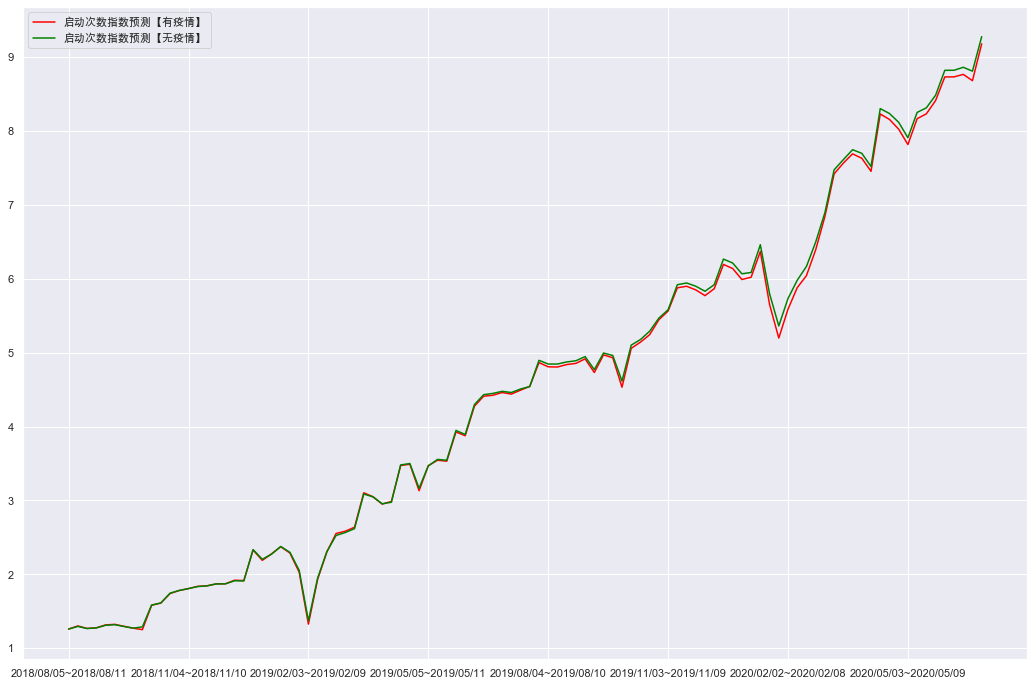

In [96]:
plt.figure()
plt.plot(regular['日期'],regular_x_small_index['启动次数指数'],color='red',label=u'启动次数指数预测【有疫情】')
plt.plot(regular['日期'],regular_x_normal_index['启动次数指数'],color='green',label=u'启动次数指数预测【无疫情】')
plt.legend()
plt.xticks(range(0,99,13))

# Hurst指数---------------------------------------------------------------------------

In [97]:
def Hurst(data):
    n = 6
    data = pd.Series(data).pct_change()[1:]
    ARS = list()
    lag = list()
    for i in range(n):
        m = 2 ** i
        size = np.size(data) // m
        lag.append(size)
        panel = {}
        for j in range(m):
             panel[str(j)] = data[j*size:(j+1)*size].values
            
        panel = pd.DataFrame(panel)
        mean = panel.mean()
        Deviation = (panel - mean).cumsum()
        maxi = Deviation.max()
        mini = Deviation.min()
        sigma = panel.std()
        RS = maxi - mini
        RS = RS / sigma
        ARS.append(RS.mean())
        
    lag = np.log10(lag)
    ARS = np.log10(ARS)
    hurst_exponent = np.polyfit(lag, ARS, 1)
    hurst = hurst_exponent[0]
     
    return hurst 

In [98]:
Hurst(regular_x_small_index['启动次数指数'])

0.6453087361504556

In [99]:
#regular_x_small_index['启动次数指数'][30:80]

In [100]:
from __future__ import division
from collections import Iterable

import numpy as np 
from pandas import Series

def calcHurst2(ts):

    if not isinstance(ts, Iterable):
        print ('error')
        return

    n_min, n_max = 2, len(ts)//3
    RSlist = []
    for cut in range(n_min, n_max):
        children = len(ts) // cut
        children_list = [ts[i*children:(i+1)*children] for i in range(cut)]
        L = []
        for a_children in children_list:
            Ma = np.mean(a_children)
            Xta = Series(map(lambda x: x-Ma, a_children)).cumsum()
            Ra = max(Xta) - min(Xta)
            Sa = np.std(a_children)
            rs = Ra / Sa
            L.append(rs)
        RS = np.mean(L)
        RSlist.append(RS)
    return np.polyfit(np.log(range(2+len(RSlist),2,-1)), np.log(RSlist), 1)[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  


In [101]:
calcHurst2(regular_x_small_index['启动次数指数'])

0.9233311673347756

In [102]:
calcHurst2(regular_x_small_index['启动次数指数'][0:76])

0.9522801241352604

In [103]:
calcHurst2(regular_x_small_index['启动次数指数'][40:90])

1.0688587109973626

In [104]:
calcHurst2(regular['启动次数'])

0.8252788176329968

H>0.5表示时间序列具有长期相关的特性，也就是过程具有持续性。如果序列在前一个期间是向上走的，那么他在下一个期间将继续向上走。反之亦然
因此，一定范围的记录会持续相当长的时期。
越接近1，这种趋势将会持续越长时间。
序列具有长期记忆性，未来的增量和过去的增量相关，继续保持现有趋势的可能性强。
H< 0.5，很有可能是记忆的转弱，趋势结束和反转的开始(mean reversion)。

# --------------------------------------------------------------------------------------

# 预测走势----------------------------------------------------------------------------